# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if os.path.exists('config.py'):
    import config as cfg
    os.environ['NEPTUNE_API_TOKEN'] = cfg.NEPTUNE_API_TOKEN
else:
    print('Setup your local configurations!')

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 200 epochs',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl'],
        'src_files': ['exp_runner.py', 'data_processor.py', 'model_trainer.py', 'model_evaluator.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 200,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.7,
        'validation_prop': 0.15,
        'test_prop': 0.15,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 200 '
                               'epochs',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f7f52fa0700>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 200,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'test_prop': 0.15,
                      'train_prop': 0.7,
                      'valida

# Load Data

In [4]:
runner.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

Starting data generators
Found 4408 validated image filenames.
Found 489 validated image filenames.
Found 864 validated image filenames.
TOTAL: 5761


# Labels Distribution

# Use Neptune

In [8]:
runner.start_neptune()
runner.create_experiment()

Starting Neptune


Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-175


# Create Model

In [9]:
runner.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [10]:
runner.train_model()

Training VGG16 network
Epoch 1/200
68/68 [==============================] - 57s 668ms/step - loss: 1.4116 - mouth_loss: 0.6593 - rotation_loss: 0.6543 - l_away_loss: 0.6759 - eyes_closed_loss: 0.6502 - close_loss: 0.4955 - hat_loss: 0.6174 - dark_glasses_loss: 0.5998 - frames_heavy_loss: 0.4930 - frame_eyes_loss: 0.6734 - flash_lenses_loss: 0.6512 - veil_loss: 0.5571 - reflection_loss: 0.6929 - light_loss: 0.5625 - sh_face_loss: 0.6849 - sh_head_loss: 0.6828 - blurred_loss: 0.5840 - ink_mark_loss: 0.4810 - skin_tone_loss: 0.6914 - washed_out_loss: 0.4900 - pixelation_loss: 0.5535 - hair_eyes_loss: 0.6209 - background_loss: 0.6926 - red_eyes_loss: 0.6523 - mouth_accuracy: 0.6971 - rotation_accuracy: 0.7235 - l_away_accuracy: 0.6544 - eyes_closed_accuracy: 0.7466 - close_accuracy: 0.9214 - hat_accuracy: 0.8061 - dark_glasses_accuracy: 0.8266 - frames_heavy_accuracy: 0.9268 - frame_eyes_accuracy: 0.6718 - flash_lenses_accuracy: 0.7454 - veil_accuracy: 0.8704 - reflection_accuracy: 0.5264 

# Plots

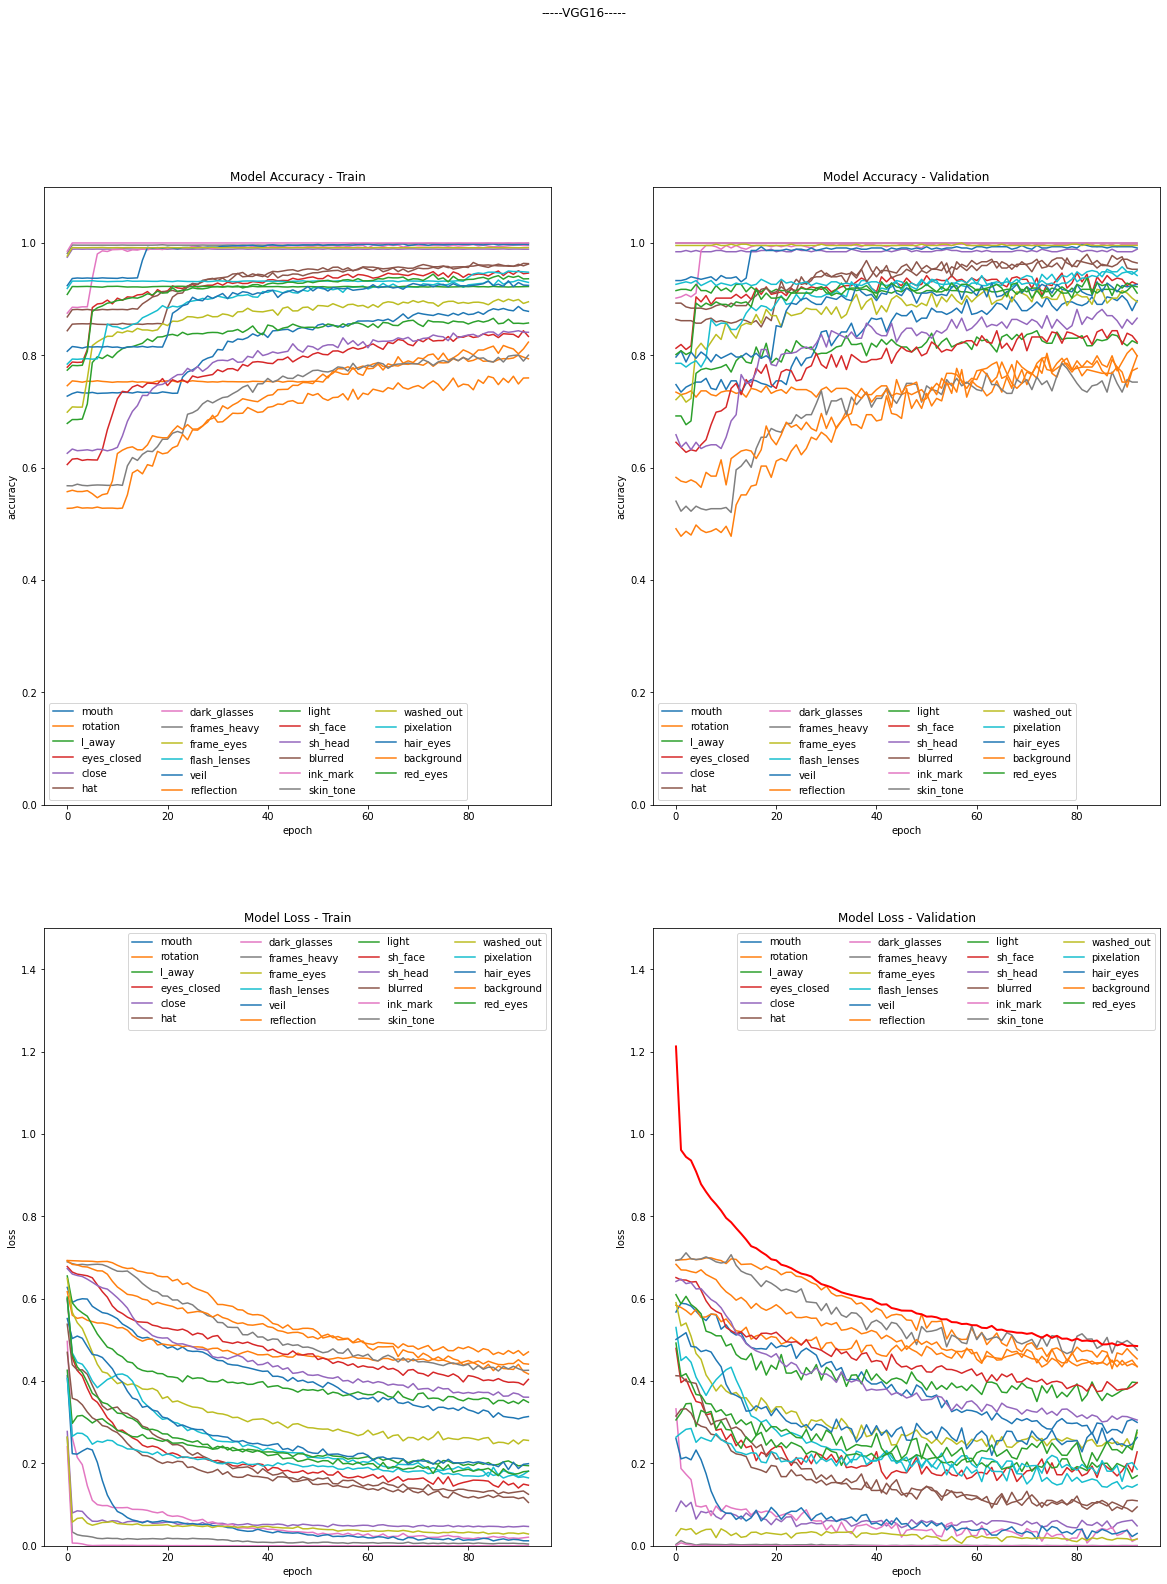

In [11]:
runner.draw_training_history()

# Load Best Model

In [12]:
runner.load_best_model()

..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [13]:
runner.save_model()

Saving model
..Saving tf model
INFO:tensorflow:Assets written to: trained_models/model/assets
..TF model saved
..Saving model to neptune..
Model saved


# Test Trained Model

Testing Trained Model
Predicting labels....
Prediction finished!
Requisite: MOUTH
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1.]
[0.82013273 0.99199134 0.00677765 0.9992028  0.04316436 0.03558471
 0.06464769 0.9700936  0.9870617  0.00905447 0.9983675  0.01278432
 0.9993895  0.18241334 0.09936429 0.02538203 0.98383313 0.03189676
 0.99150485 0.03112082 0.01587691 0.99833304 0.9982627  0.9740269
 0.9954254  0.00651242 0.9968861  0.02053011 0.99828607 0.02111101
 0.05657518 0.01518491 0.9957594  0.9995666  0.9998381  0.9497657
 0.02473486 0.9982595  0.9862346  0.11197621 0.9985765  0.3484509
 0.02110097 0.04888349 0.9780927  0.98590916 0.99304926 0.5463484
 0.04955591 0.9943808 ]
[1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 1 1 1 1 0 1]
Classification report -----------------------------------
               precision    recall  f1-score   

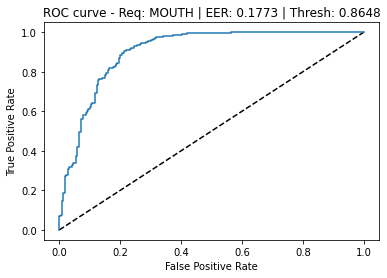

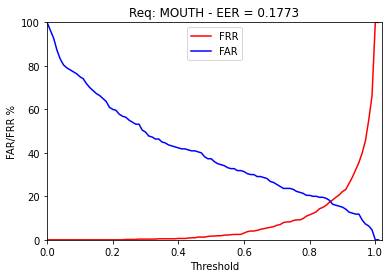

Requisite: ICAO_REQ.MOUTH - EER: 17.7273% - Best Threshold: 0.8647697567941884
Confusion matrix ----------------------------------------
TP: 633 | TN: 138 | FP: 82 | FN: 11
Requisite: ROTATION
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1.]
[0.9884608  0.9902249  0.9952016  0.88248324 0.9545048  0.97156197
 0.94658697 0.9463472  0.9953177  0.99388474 0.975695   0.9864762
 0.93313134 0.94216317 0.94978315 0.98489136 0.99074745 0.9645089
 0.9728425  0.9634819  0.9836156  0.9890047  0.99139786 0.9268997
 0.99610233 0.9966474  0.9671164  0.97870934 0.987547   0.98982143
 0.97854704 0.9924199  0.96715283 0.98978907 0.9429907  0.91790307
 0.98577684 0.9852893  0.9928565  0.95291585 0.9971085  0.98744464
 0.94964224 0.95930326 0.99401736 0.9933509  0.994507   0.98120946
 0.9703939  0.9310114 ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

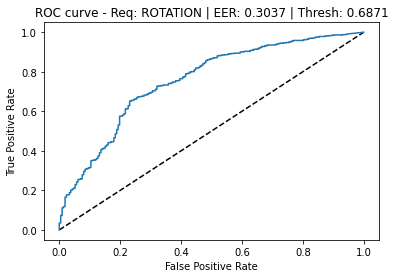

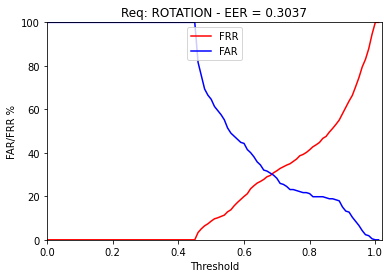

Requisite: ICAO_REQ.ROTATION - EER: 30.3681% - Best Threshold: 0.6871135527370994
Confusion matrix ----------------------------------------
TP: 596 | TN: 75 | FP: 137 | FN: 56
Requisite: L_AWAY
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0.]
[9.99036193e-01 9.99623179e-01 9.99998927e-01 9.90006447e-01
 9.99656796e-01 9.97473657e-01 2.54584383e-02 9.83778894e-01
 3.28903639e-04 9.99960899e-01 6.32742071e-04 9.99895096e-01
 9.96555209e-01 9.52443182e-01 1.04610540e-01 9.99250352e-01
 9.98404920e-01 9.98973608e-01 9.98998463e-01 9.98092115e-01
 9.99769270e-01 2.04352909e-04 2.79174710e-04 9.59359527e-01
 1.09674744e-04 9.99994993e-01 2.76556792e-04 9.99568284e-01
 9.99754608e-01 9.99972105e-01 7.08031887e-03 9.99979138e-01
 1.02848967e-03 9.99930382e-01 1.38080053e-04 9.93459702e-01
 9.99917626e-01 9.42276150e-04 1.20011077e-03 1.91197786e-02
 1.72065818e-04 9.96893406e-01 9.99547184e

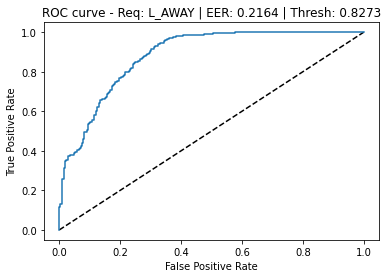

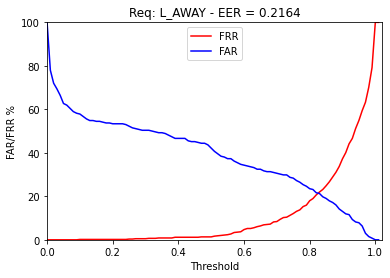

Requisite: ICAO_REQ.L_AWAY - EER: 21.6418% - Best Threshold: 0.8272888660431726
Confusion matrix ----------------------------------------
TP: 588 | TN: 155 | FP: 113 | FN: 8
Requisite: EYES_CLOSED
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0.]
[1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9999952e-01 1.0000000e+00
 9.9999857e-01 3.0600477e-02 9.9998033e-01 5.4719887e-04 1.0000000e+00
 1.1841203e-03 1.0000000e+00 1.0000000e+00 9.9971420e-01 1.5172702e-01
 9.9999988e-01 1.0000000e+00 9.9999988e-01 1.0000000e+00 9.9999964e-01
 1.0000000e+00 4.3464536e-04 5.0129043e-04 9.9986434e-01 2.4427427e-04
 1.0000000e+00 5.3193053e-04 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.7677603e-02 1.0000000e+00 1.3666195e-03 1.0000000e+00 3.4475242e-04
 9.9999964e-01 1.0000000e+00 1.3945875e-03 1.6888758e-03 3.6158584e-02
 2.8976888e-04 9.9999940e-01 1.0000000e+00 9.5328027e-01 1.0187218e-03
 1.0000000

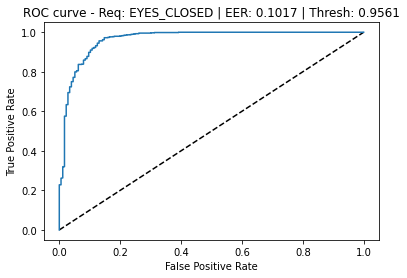

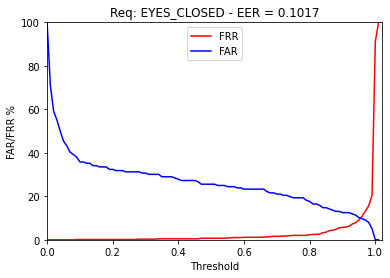

Requisite: ICAO_REQ.EYES_CLOSED - EER: 10.1744% - Best Threshold: 0.9561488697695177
Confusion matrix ----------------------------------------
TP: 683 | TN: 131 | FP: 45 | FN: 5
Requisite: CLOSE
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1.         1.         1.         0.999998   0.99994195 0.9999002
 0.9999999  1.         1.         0.9999976  1.         0.9999857
 1.         0.99999547 0.9999988  0.99999046 1.         0.99973327
 0.9999999  0.9998072  0.9999906  1.         1.         0.99999976
 1.         0.9999989  1.         0.9999881  1.         0.999998
 1.         0.99999523 1.         1.         1.         0.9999809
 0.9999931  1.         1.         0.9999994  1.         1.
 0.99997413 1.         1.         1.         1.         1.
 0.9999659  0.9999999 ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classific

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


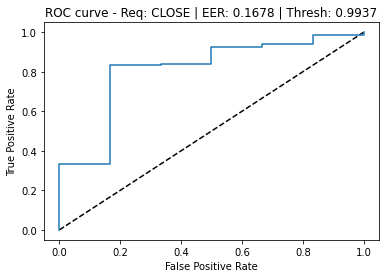

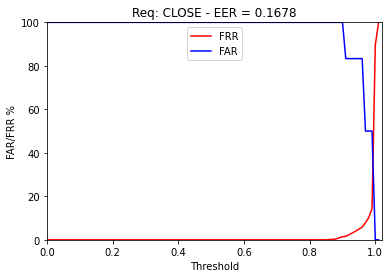

Requisite: ICAO_REQ.CLOSE - EER: 16.7832% - Best Threshold: 0.9936698345871239
Confusion matrix ----------------------------------------
TP: 858 | TN: 0 | FP: 6 | FN: 0
Requisite: HAT
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1.         1.         1.         1.         0.99985826 0.9999982
 1.         1.         1.         1.         1.         0.9999999
 1.         1.         1.         0.9999999  1.         0.9999895
 1.         0.9999436  0.99999976 1.         1.         1.
 1.         1.         1.         0.9999999  1.         1.
 1.         0.9999999  1.         1.         1.         0.99999034
 0.9999999  1.         1.         1.         1.         1.
 0.9999988  1.         1.         1.         1.         1.
 0.9981629  1.        ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report ------------

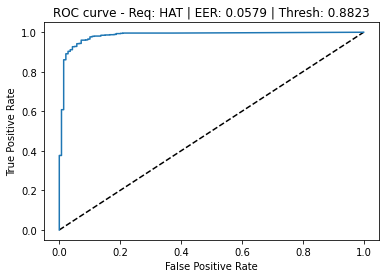

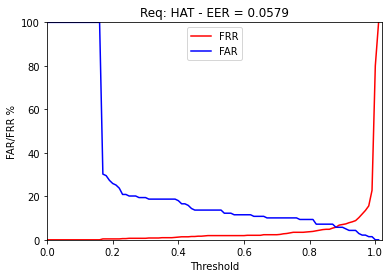

Requisite: ICAO_REQ.HAT - EER: 5.7931% - Best Threshold: 0.8823077551249744
Confusion matrix ----------------------------------------
TP: 711 | TN: 120 | FP: 19 | FN: 14
Requisite: DARK_GLASSES
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0.]
[1.         1.         1.         1.         1.         1.
 0.9999987  1.         0.05556679 1.         0.05556679 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.05556679 0.05556679 1.
 0.05556679 1.         0.05556679 1.         1.         1.
 1.         1.         0.05556679 1.         0.05556679 1.
 1.         0.05556679 0.05556679 1.         0.05556679 1.
 1.         1.         0.05556679 1.         0.05556679 1.
 1.         0.05556679]
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 0]
Classification report -------------------------------

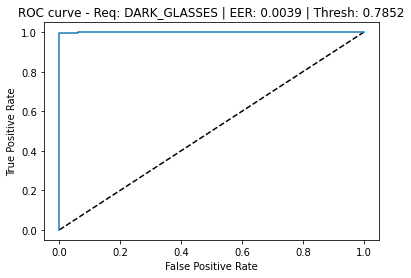

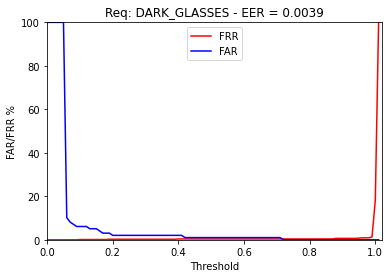

Requisite: ICAO_REQ.DARK_GLASSES - EER: 0.3916% - Best Threshold: 0.7851620109523254
Confusion matrix ----------------------------------------
TP: 763 | TN: 97 | FP: 1 | FN: 3
Requisite: FRAMES_HEAVY
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      1.00      1.00         2
    COMPLIANT       1.00      1.00      1.00       862

     accuracy                           1.00       864
    macro avg       1.00      1.00      1.00       864
 weighted avg       1.00      1.00      1.00       864

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


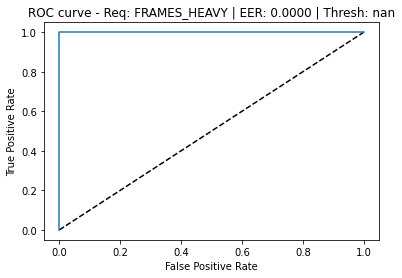

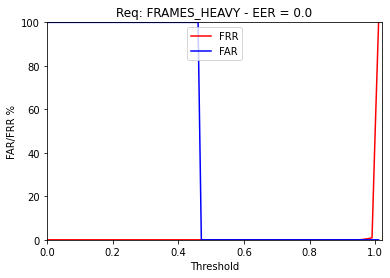

Invalid metric value: nan for channel best_th. Metrics with nan or +/-inf values will not be sent to server


Requisite: ICAO_REQ.FRAMES_HEAVY - EER: 0.0% - Best Threshold: nan
Confusion matrix ----------------------------------------
TP: 862 | TN: 2 | FP: 0 | FN: 0
Requisite: FRAME_EYES
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0.]
[0.9999994  1.         1.         0.9997323  0.9970186  0.99988556
 0.6456771  0.99974877 0.13718651 0.99999976 0.13718651 0.9999994
 0.99999774 0.99848217 0.74790335 0.9999893  0.99999976 0.99999475
 0.99999964 0.9999856  0.99999964 0.13718651 0.13718651 0.9984072
 0.13718651 1.         0.13718651 0.99999976 1.         1.
 0.58836704 0.9999999  0.13718651 1.         0.13718651 0.99999344
 0.99999964 0.13718651 0.13718651 0.5259298  0.13718651 0.9999864
 0.99999607 0.9526554  0.13718651 0.99926275 0.13718651 0.99996865
 0.99064857 0.13718651]
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 0]
Classification 

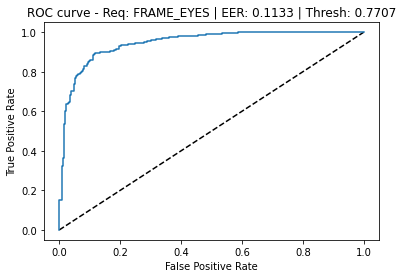

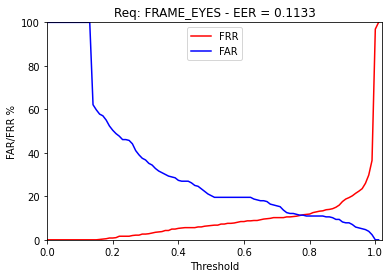

Requisite: ICAO_REQ.FRAME_EYES - EER: 11.3281% - Best Threshold: 0.7707210183131411
Confusion matrix ----------------------------------------
TP: 568 | TN: 204 | FP: 52 | FN: 40
Requisite: FLASH_LENSES
[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0.]
[0.9999945  0.99999845 1.         0.9635215  0.25175825 0.9887706
 0.4676979  0.99922705 0.14897326 0.9984999  0.14897326 0.9979419
 0.9999846  0.9984357  0.99988794 0.9985586  0.9768499  0.99996614
 0.9983234  0.9969394  0.99994385 0.14897326 0.14897326 0.99602014
 0.14897326 0.99999964 0.14897326 0.9999999  1.         0.99999714
 0.9907862  0.9998542  0.14897326 0.99999964 0.14897326 0.99997044
 0.9999548  0.14897326 0.14897326 0.99606895 0.14897326 0.99829644
 0.9999778  0.14897326 0.14897326 0.14897326 0.14897326 0.99989617
 0.14897326 0.14926301]
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 

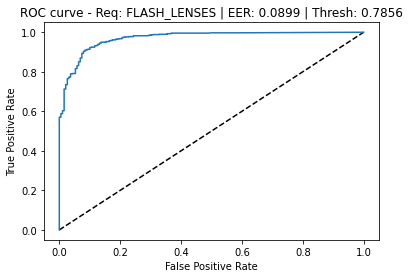

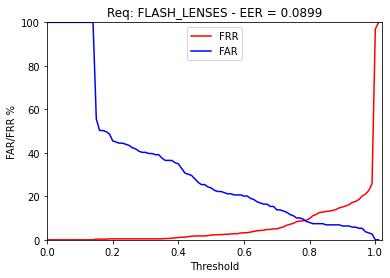

Requisite: ICAO_REQ.FLASH_LENSES - EER: 8.9947% - Best Threshold: 0.7856240868587706
Confusion matrix ----------------------------------------
TP: 660 | TN: 144 | FP: 45 | FN: 15
Requisite: VEIL
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1.]
[1.         1.         0.09094559 1.         0.09094559 0.09094559
 1.         1.         1.         0.09094559 1.         0.09094559
 1.         1.         1.         0.09094559 1.         0.09094559
 1.         0.09094559 0.09094559 1.         1.         1.
 1.         0.09094559 1.         0.09094559 1.         0.09094559
 1.         0.09094559 1.         1.         1.         1.
 0.09094559 1.         1.         1.         1.         1.
 0.09094559 1.         1.         0.99999905 1.         1.
 0.09094559 1.        ]
[1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1]
Classification repor

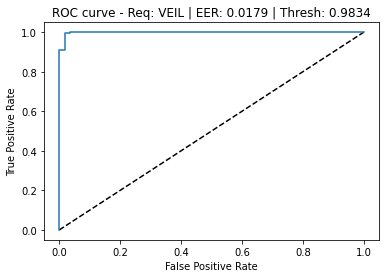

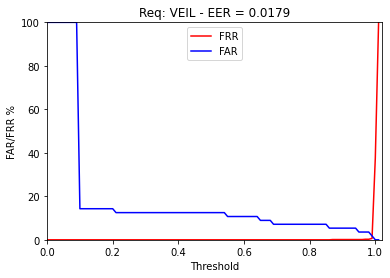

Requisite: ICAO_REQ.VEIL - EER: 1.7857% - Best Threshold: 0.9834465384482834
Confusion matrix ----------------------------------------
TP: 808 | TN: 49 | FP: 7 | FN: 0
Requisite: REFLECTION
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1.]
[0.9990606  0.0102171  0.03486432 0.07429096 0.854802   0.14797783
 0.999445   0.99521637 0.00375328 0.2924297  0.01377838 0.7338143
 0.9539005  0.96083164 0.9896231  0.09105434 0.00959735 0.6902749
 0.13533826 0.8242179  0.5300174  0.99963164 0.05881956 0.9836495
 0.00304145 0.27145824 0.97728914 0.30994418 0.14131607 0.06019611
 0.9989268  0.19758019 0.01497849 0.01016019 0.9972024  0.08694169
 0.0884441  0.01150786 0.00488123 0.9925586  0.00165512 0.9989858
 0.3829152  0.99994457 0.00546041 0.00500107 0.00368139 0.99657816
 0.9202903  0.4259788 ]
[1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 1 

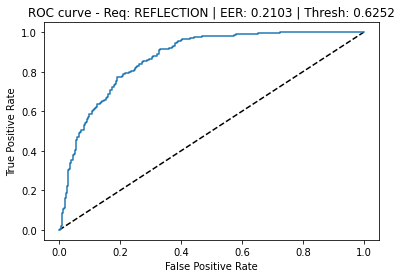

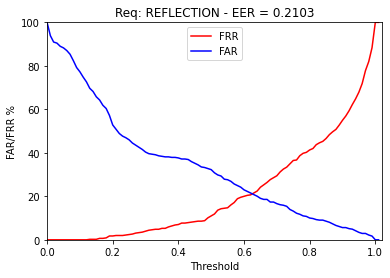

Requisite: ICAO_REQ.REFLECTION - EER: 21.0269% - Best Threshold: 0.6252112388612359
Confusion matrix ----------------------------------------
TP: 405 | TN: 277 | FP: 132 | FN: 50
Requisite: LIGHT
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1.]
[0.9999907  0.91347957 0.9993986  0.9161295  0.989776   0.9728179
 0.99997497 0.99956113 0.9989003  0.9972819  0.99770206 0.9938962
 0.99567896 0.9978781  0.9998907  0.9797305  0.54323155 0.98779756
 0.9819697  0.9644231  0.9842768  0.99995935 0.99977845 0.9995316
 0.9997693  0.9991086  0.9997664  0.9845569  0.9957996  0.99628913
 0.99999535 0.99645245 0.98987514 0.9438965  0.99997675 0.93199545
 0.99314296 0.99532384 0.9948323  0.99996006 0.998727   0.9999715
 0.9919478  0.9999989  0.99790514 0.6174043  0.99399006 0.999777
 0.97624356 0.9961302 ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


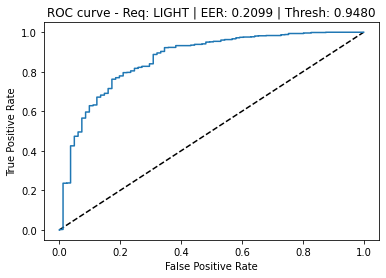

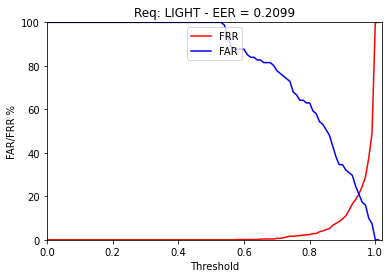

Requisite: ICAO_REQ.LIGHT - EER: 20.9877% - Best Threshold: 0.9479623436927401
Confusion matrix ----------------------------------------
TP: 783 | TN: 0 | FP: 81 | FN: 0
Requisite: SH_FACE
[1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.9999846  0.9979761  0.03219257 0.9265424  0.22298273 0.09979074
 0.9995296  0.9991634  0.9985258  0.06371434 0.9876973  0.10407702
 0.99153847 0.9926933  0.99848205 0.07651498 0.99613225 0.13951525
 0.9967828  0.19770242 0.11879424 0.99966633 0.99912137 0.9983852
 0.99926406 0.04336086 0.99797994 0.10722374 0.9994784  0.05425879
 0.99987924 0.06214088 0.98604995 0.99473286 0.99669075 0.9688825
 0.06650498 0.9932508  0.9969406  0.99926037 0.9995221  0.999954
 0.11534584 0.99996305 0.99771994 0.9762942  0.99805474 0.9997002
 0.2856163  0.965785  ]
[1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1]

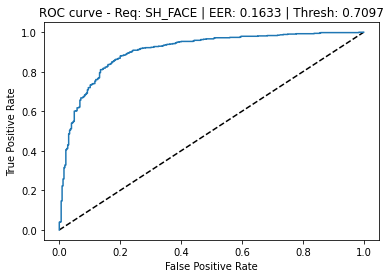

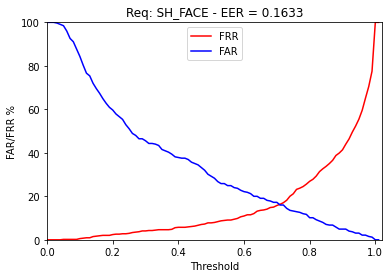

Requisite: ICAO_REQ.SHADOW_FACE - EER: 16.3265% - Best Threshold: 0.7097109179107484
Confusion matrix ----------------------------------------
TP: 497 | TN: 230 | FP: 95 | FN: 42
Requisite: SH_HEAD
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.99999964 0.99999726 0.9999999  0.99844176 0.99291766 0.9990534
 0.9998385  0.9999535  1.         0.9999697  0.99999833 0.99961203
 0.9996369  0.9993912  0.9989009  0.9999393  0.9999995  0.98899335
 0.9999645  0.99063665 0.9996031  0.9999989  1.         0.9991358
 1.         0.99997556 0.9999763  0.9993838  0.9999436  0.99998534
 0.9999783  0.99993026 0.9999666  0.9999889  0.9999963  0.9975889
 0.99995327 0.99999785 0.9999999  0.99957615 1.         0.99999595
 0.99931633 0.9999993  1.         0.9999999  0.99999976 0.9999628
 0.98649096 0.99961   ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

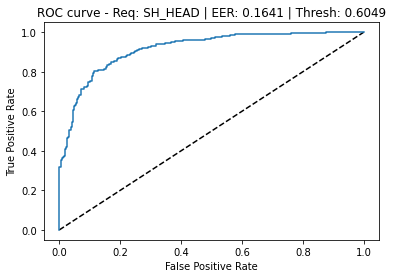

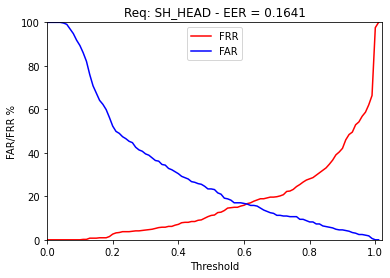

Requisite: ICAO_REQ.SHADOW_HEAD - EER: 16.4134% - Best Threshold: 0.6048591732973
Confusion matrix ----------------------------------------
TP: 475 | TN: 252 | FP: 77 | FN: 60
Requisite: BLURRED
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1.         1.         1.         1.         0.99999595 0.9999999
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.9999963
 1.         0.99999905 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.9999993  0.99999976]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report ----------------

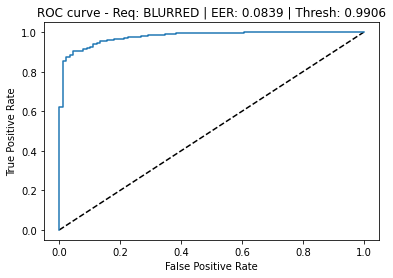

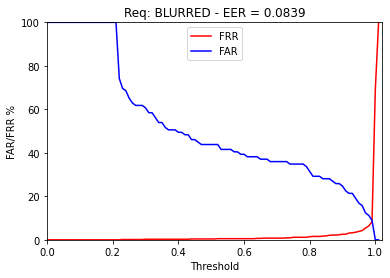

Requisite: ICAO_REQ.BLURRED - EER: 8.3871% - Best Threshold: 0.9905982055971699
Confusion matrix ----------------------------------------
TP: 772 | TN: 50 | FP: 39 | FN: 3
Requisite: SKIN_TONE
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1.]
[9.9969423e-01 2.5521050e-04 3.0719431e-04 5.0705865e-02 4.3605423e-01
 1.7514855e-02 9.9959594e-01 9.9727988e-01 3.5187466e-05 1.0299587e-02
 1.8033131e-03 8.0580145e-02 9.6435201e-01 9.7533095e-01 9.9603242e-01
 4.6287775e-03 9.5512412e-05 1.7878342e-01 4.6543170e-02 3.1558788e-01
 3.4895282e-02 9.9987996e-01 5.3555347e-02 9.9366623e-01 4.0755975e-05
 7.5739175e-03 9.9588156e-01 2.4221787e-02 1.0122038e-01 1.8771207e-03
 9.9964190e-01 9.1249179e-03 9.5371663e-04 6.7630771e-04 9.9934489e-01
 2.4304226e-02 4.2449334e-03 7.8443752e-04 6.3534673e-05 9.9800831e-01
 8.5339652e-06 9.9949324e-01 4.0301375e-02 9.9996614e-01 6.5091081e-05
 2.0870619e-05

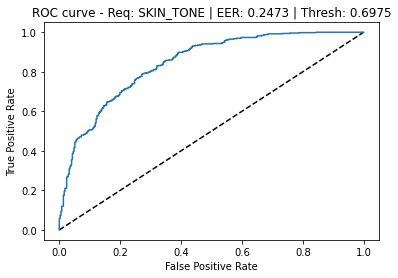

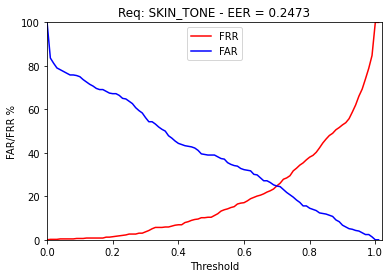

Requisite: ICAO_REQ.SKIN_TONE - EER: 24.7312% - Best Threshold: 0.6975426077833738
Confusion matrix ----------------------------------------
TP: 441 | TN: 227 | FP: 145 | FN: 51
Requisite: WASHED_OUT
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.9995028  0.996754   1.         0.99768627 0.99999404 0.99999595
 0.99999917 0.99796873 1.         1.         1.         0.99999976
 0.9881765  0.9963322  0.99999034 0.99999976 0.9991597  0.99998415
 0.98688066 0.9999838  0.99999976 1.         1.         0.9982495
 1.         1.         1.         0.99999964 0.9991037  1.
 0.9999999  0.9999999  1.         0.99960786 1.         0.9688885
 0.99999964 1.         1.         0.9999914  1.         0.99994636
 0.9999993  0.9999999  1.         0.9999974  1.         0.99944764
 0.99999845 0.99999964]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


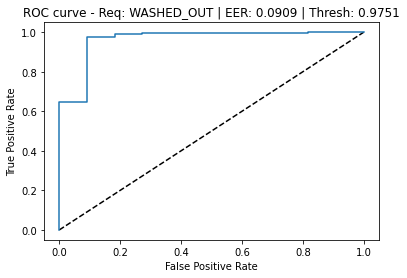

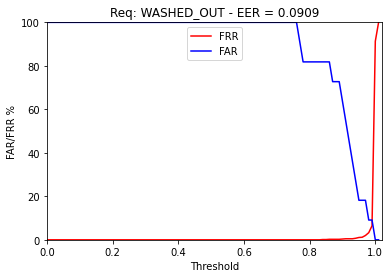

Requisite: ICAO_REQ.WASHED_OUT - EER: 9.0909% - Best Threshold: 0.9751294851303037
Confusion matrix ----------------------------------------
TP: 853 | TN: 0 | FP: 11 | FN: 0
Requisite: PIXELATION
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.99984765 0.99842024 0.9993795  0.99989736 0.99991596 0.9758857
 0.99900925 0.99966216 0.99846834 0.99834096 0.9998865  0.99974066
 0.99983096 0.9972345  0.9916164  0.9743103  0.99479127 0.9954131
 0.9993079  0.99648935 0.9969919  0.9999739  0.9998988  0.9994355
 0.99985063 0.9988115  0.99990964 0.9921142  0.9981463  0.9971566
 0.9938968  0.9990927  0.99917334 0.9998913  0.99999416 0.99547994
 0.99402595 0.99963856 0.994058   0.98791003 0.99956244 0.9997037
 0.9977526  0.9997818  0.9945557  0.99978036 0.9971711  0.998648
 0.9998833  0.99853766]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

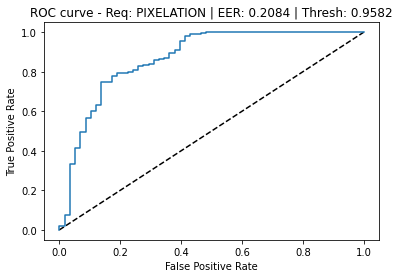

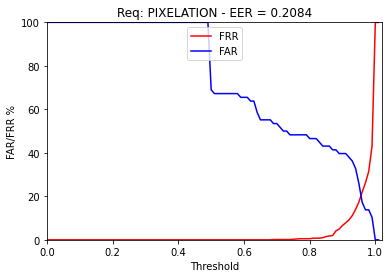

Requisite: ICAO_REQ.PIXELATION - EER: 20.8437% - Best Threshold: 0.9581967323057113
Confusion matrix ----------------------------------------
TP: 806 | TN: 18 | FP: 40 | FN: 0
Requisite: HAIR_EYES
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.99999833 1.         0.99999857 0.9999876  0.99999535 0.9997799
 0.54162395 0.9994899  0.9999999  0.9999963  0.9999974  0.99998903
 0.99998593 0.99782145 0.4662455  0.99996376 1.         0.9994442
 1.         0.9999119  0.99999106 0.99997175 0.99999964 0.99838114
 1.         0.999998   0.9999895  0.99993587 1.         0.9999987
 0.42296624 0.99999964 0.9999993  1.         0.9999616  0.99999416
 0.9999924  0.9999994  0.99999917 0.34778485 1.         0.9999981
 0.99913126 0.97801274 0.99999917 1.         1.         0.99998033
 1.         0.9996846 ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1

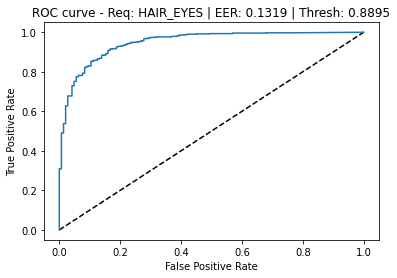

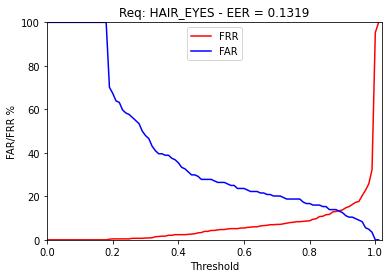

Requisite: ICAO_REQ.HAIR_EYES - EER: 13.1944% - Best Threshold: 0.8895482420921325
Confusion matrix ----------------------------------------
TP: 689 | TN: 104 | FP: 40 | FN: 31
Requisite: BACKGROUND
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0.]
[0.3975091  0.94205016 0.8733241  0.54864407 0.33239555 0.59711456
 0.3235976  0.38184196 0.80290264 0.6355162  0.77942383 0.5168363
 0.5366249  0.34554407 0.32431543 0.7032882  0.9548926  0.48402536
 0.7525037  0.46719155 0.69282156 0.44606936 0.76843244 0.36559936
 0.8404464  0.70962024 0.5724335  0.734895   0.96409935 0.78991735
 0.32389936 0.6877849  0.75408167 0.91541743 0.78209    0.76594895
 0.72934574 0.7487434  0.74823964 0.32496023 0.8453708  0.3715794
 0.5917356  0.3235976  0.7726397  0.7696815  0.7649899  0.3797463
 0.32811645 0.6195965 ]
[0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 

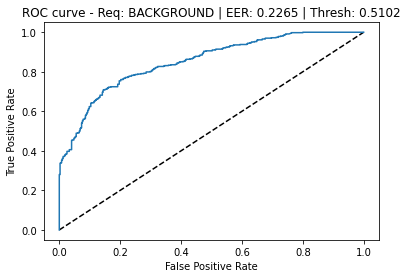

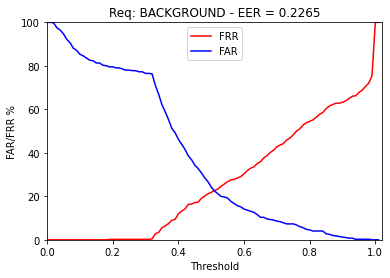

Requisite: ICAO_REQ.BACKGROUND - EER: 22.6496% - Best Threshold: 0.5101774380757258
Confusion matrix ----------------------------------------
TP: 366 | TN: 300 | FP: 96 | FN: 102
Requisite: RED_EYES
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0.]
[0.9999999  1.         1.         0.9999981  1.         0.9999981
 0.10302438 0.9999536  0.10302438 1.         0.10302438 1.
 0.99999976 0.99938905 0.26796597 0.99999976 1.         0.9999999
 1.         0.9999995  1.         0.10302438 0.10302438 0.999691
 0.10302438 1.         0.10302438 1.         1.         1.
 0.10302438 1.         0.10302438 1.         0.10302438 0.99999857
 1.         0.10302438 0.10302438 0.10311802 0.10302438 0.9999982
 1.         0.92525643 0.10302438 1.         0.10302438 0.99998784
 0.9999999  0.10302438]
[1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 0]
Class

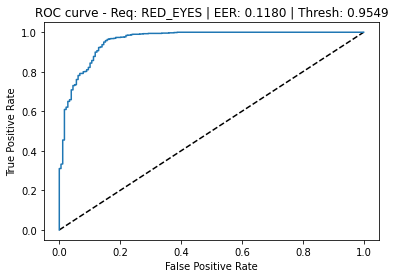

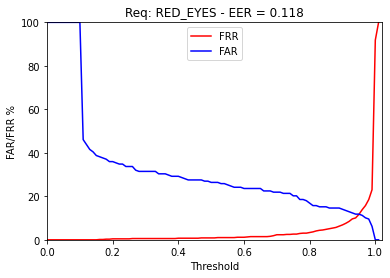

Requisite: ICAO_REQ.RED_EYES - EER: 11.7978% - Best Threshold: 0.9548655152322912
Confusion matrix ----------------------------------------
TP: 680 | TN: 131 | FP: 47 | FN: 6


In [14]:
runner.test_model()

# Evaluate Model

In [15]:
runner.evaluate_model()

Evaluating model
Loss: 0.5371
Accuracy: 32.18%


# Vizualize Model Classification

# Finishing Experiment Manager

In [16]:
runner.finish_experiment()

Finishing Neptune
